In [2]:
import os
os.chdir('/content/drive/MyDrive/IDS/IDS_Project')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
for col_name in df.columns: 
    print(col_name)

Close
Compound_Score
Total Volume of Tweets
Count_Negatives
Count_Positives
Count_Neutrals
Sent_Negatives
Sent_Positives
Count_News
Count_Bots
Open
High
Low


In [17]:
print(df["Count_Negatives"].std())
print(df["Sent_Negatives"].std())

165.6945263939214
0.03998731766422437


In [23]:
df = pd.read_csv("df_Final.csv", sep = ';')[['Date','Close', 'Compound_Score', 'Total Volume of Tweets', 'Count_Negatives',
       'Count_Positives', 'Count_Neutrals', 'Sent_Negatives', 'Sent_Positives','Count_News', 'Count_Bots','Open','High','Low']]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()


,Close,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low
Date,,,,,,,,,,,,,
2017-08-01 00:00:00,2825.92,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00
2017-08-01 01:00:00,2853.38,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01
2017-08-01 02:00:00,2841.60,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31
2017-08-01 03:00:00,2862.93,-0.021037,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73
2017-08-01 04:00:00,2874.99,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11


In [16]:

print(df.std())

Close                     3092.611513
Compound_Score               0.041871
Total Volume of Tweets     744.829807
Count_Negatives            165.694526
Count_Positives            249.744699
Count_Neutrals             304.934847
Sent_Negatives               0.039987
Sent_Positives               0.035919
Count_News                 488.043127
Count_Bots                  90.558652
Open                      3092.503089
High                      3129.294967
Low                       3052.089040
dtype: float64


In [ ]:
'''df = pd.read_csv("Data_To_Hourervals_no_filter.csv", sep = ';')[['Date','Close', 'Compound_Score', 'Count_Negatives',
       'Count_Positives', 'Count_Neutrals', 'Sent_Negatives', 'Sent_Positives',
       ]]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()'''

'df = pd.read_csv("Data_To_Hourervals_no_filter.csv", sep = \';\')[[\'Date\',\'Close\', \'Compound_Score\', \'Count_Negatives\',\n       \'Count_Positives\', \'Count_Neutrals\', \'Sent_Negatives\', \'Sent_Positives\',\n       ]]\ndf = df.set_index(\'Date\')\ndf.index = pd.to_datetime(df.index)\ndf.head()'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12936 entries, 2017-08-01 00:00:00 to 2019-01-21 23:00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Close                   12358 non-null  float64
 1   Compound_Score          12358 non-null  float64
 2   Total Volume of Tweets  12358 non-null  float64
 3   Count_Negatives         12358 non-null  float64
 4   Count_Positives         12358 non-null  float64
 5   Count_Neutrals          12358 non-null  float64
 6   Sent_Negatives          12358 non-null  float64
 7   Sent_Positives          12357 non-null  float64
 8   Count_News              12358 non-null  float64
 9   Count_Bots              12358 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


In [6]:
df.columns

Index(['Close', 'Compound_Score', 'Total Volume of Tweets', 'Count_Negatives',
       'Count_Positives', 'Count_Neutrals', 'Sent_Negatives', 'Sent_Positives',
       'Count_News', 'Count_Bots'],
      dtype='object')

In [7]:
df['Close'].describe()

count    12358.000000
mean      7272.666525
std       3092.611513
min       2672.400000
25%       4897.895000
50%       6618.790000
75%       8365.727500
max      19784.930000
Name: Close, dtype: float64

In [ ]:
df['Count_News'].describe()

count    12358.000000
mean       932.235313
std        488.043127
min          3.000000
25%        596.000000
50%        807.000000
75%       1117.000000
max       4485.000000
Name: Count_News, dtype: float64

In [ ]:
df.describe()

,Close,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots
count,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12357.000000,12358.000000,12358.000000
mean,7272.666525,0.102471,1435.306603,231.219372,450.643227,529.477424,-0.408891,0.472846,932.235313,223.966095
std,3092.611513,0.041871,744.829807,165.694526,249.744699,304.934847,0.039987,0.035919,488.043127,90.558652
min,2672.400000,-0.180767,3.000000,1.000000,0.000000,2.000000,-0.700246,0.175518,3.000000,0.000000
25%,4897.895000,0.078411,953.000000,130.000000,290.000000,332.000000,-0.431987,0.452991,596.000000,160.250000
50%,6618.790000,0.102270,1239.000000,184.000000,387.000000,449.000000,-0.409077,0.474032,807.000000,208.000000
75%,8365.727500,0.126179,1681.000000,276.000000,530.000000,628.000000,-0.385703,0.493470,1117.000000,270.000000
max,19784.930000,0.487209,12696.000000,3085.000000,4494.000000,4716.000000,-0.187332,0.669546,4485.000000,2092.000000


In [ ]:
#Correlation of all values
cor = df.corr()
cor

,Close,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots
Close,1.000000,0.002701,0.640946,0.547246,0.651726,0.585044,-0.063404,0.039259,0.625217,0.503039
Compound_Score,0.002701,1.000000,-0.248370,-0.434999,-0.073649,-0.272895,0.215160,0.495808,-0.275327,-0.124859
Total Volume of Tweets,0.640946,-0.248370,1.000000,0.917488,0.963842,0.963739,-0.054053,-0.163937,0.976627,0.642838
Count_Negatives,0.547246,-0.434999,0.917488,1.000000,0.872717,0.836368,-0.092865,-0.151334,0.878336,0.493422
Count_Positives,0.651726,-0.073649,0.963842,0.872717,1.000000,0.897464,-0.048512,-0.119367,0.930285,0.550811
Count_Neutrals,0.585044,-0.272895,0.963739,0.836368,0.897464,1.000000,-0.016061,-0.207534,0.963239,0.553976
Sent_Negatives,-0.063404,0.215160,-0.054053,-0.092865,-0.048512,-0.016061,1.000000,-0.124143,-0.035106,-0.086785
Sent_Positives,0.039259,0.495808,-0.163937,-0.151334,-0.119367,-0.207534,-0.124143,1.000000,-0.209319,-0.043408
Count_News,0.625217,-0.275327,0.976627,0.878336,0.930285,0.963239,-0.035106,-0.209319,1.000000,0.616460
Count_Bots,0.503039,-0.124859,0.642838,0.493422,0.550811,0.553976,-0.086785,-0.043408,0.616460,1.000000


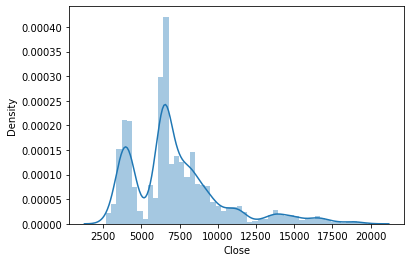

In [ ]:
#histogram
sns.distplot(df['Close']);

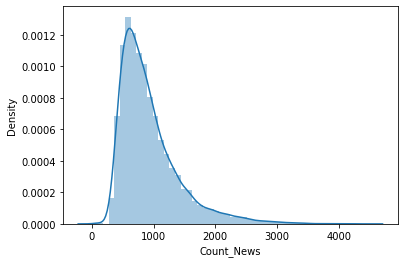

In [ ]:
sns.distplot(df['Count_News']);

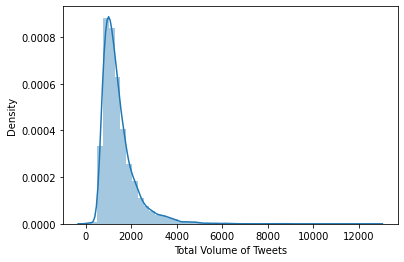

In [ ]:
sns.distplot(df['Total Volume of Tweets']);

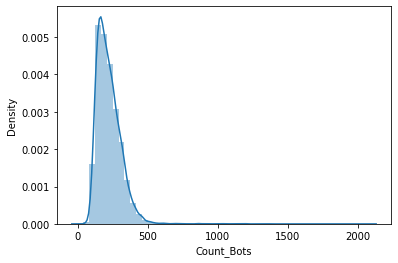

In [ ]:
sns.distplot(df['Count_Bots']);

In [ ]:
print("Skewness: %f" % df['Close'].skew())
print("Kurtosis: %f" % df['Close'].kurt())

Skewness: 1.305742
Kurtosis: 1.971366


In [ ]:
print("Skewness: %f" % df['Count_Bots'].skew())
print("Kurtosis: %f" % df['Count_Bots'].kurt())

Skewness: 3.202161
Kurtosis: 35.446543


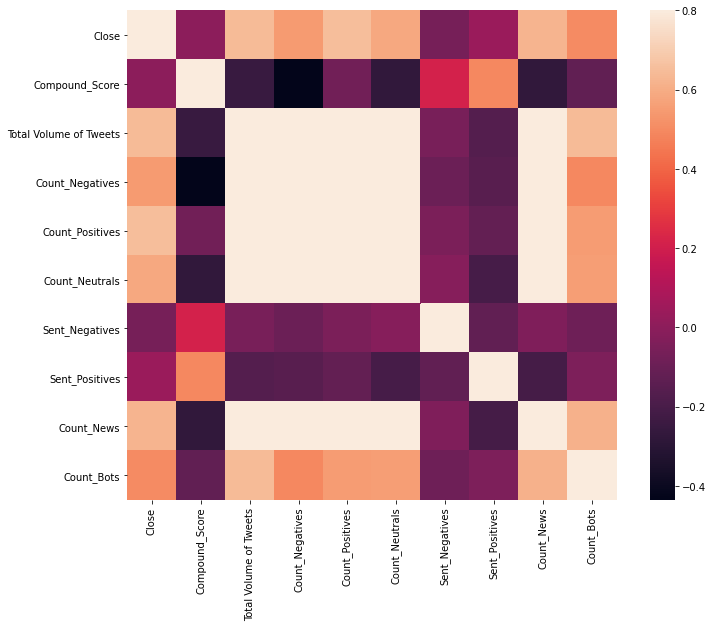

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

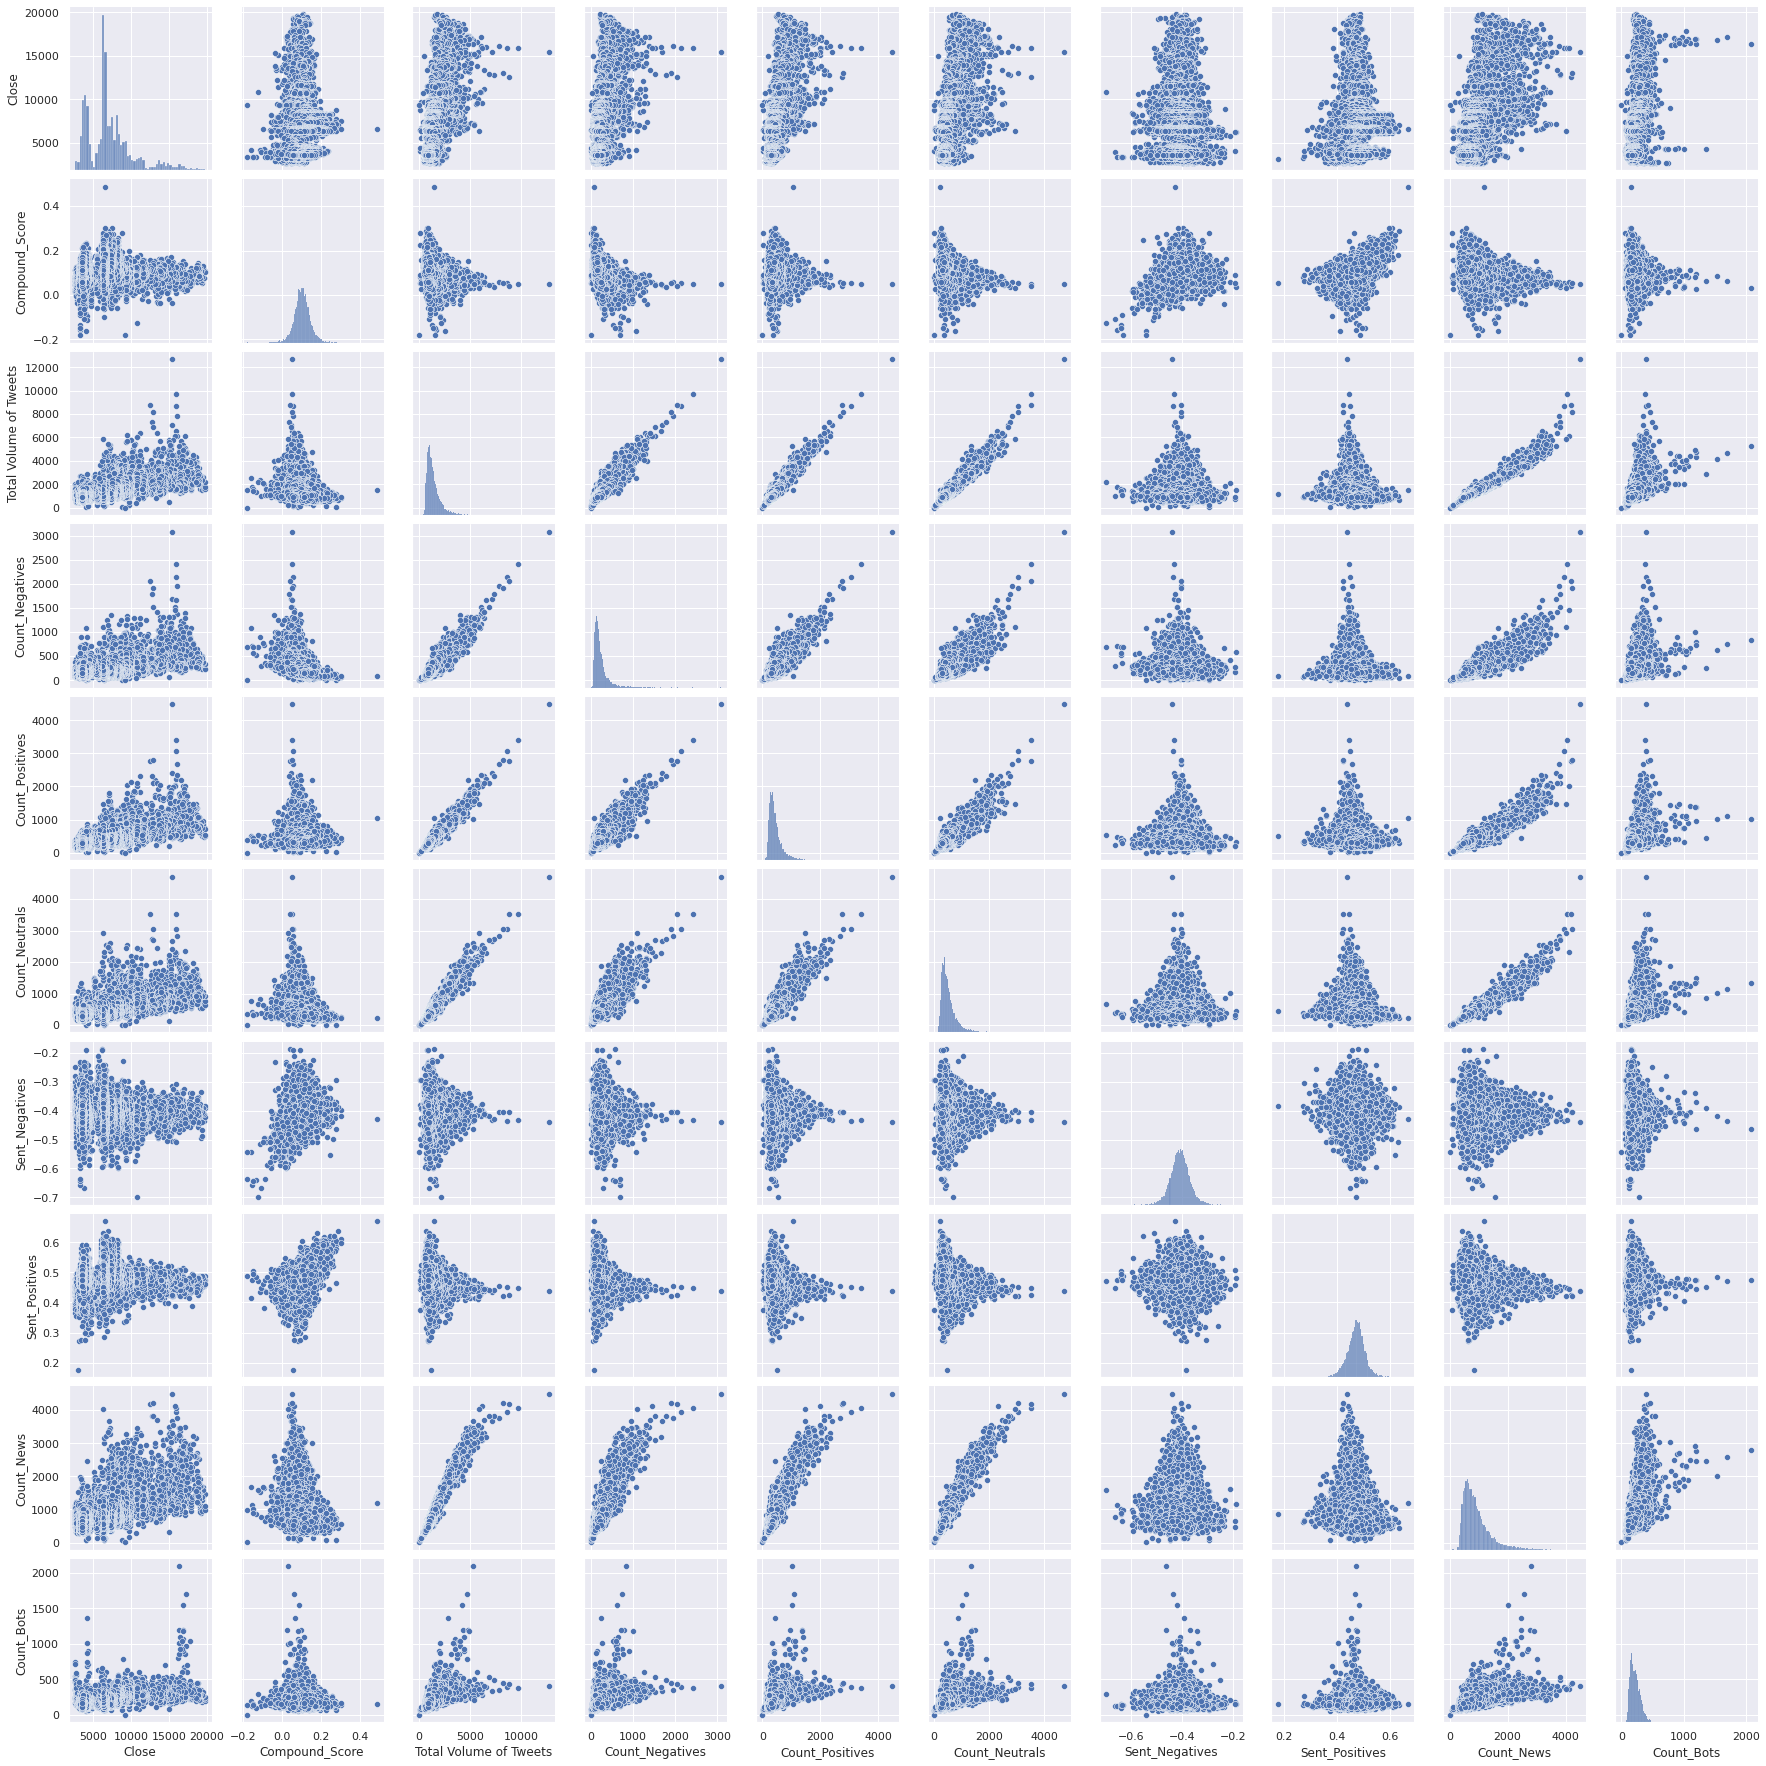

In [ ]:
sns.set()
cols = ['Close', 'Compound_Score', 'Total Volume of Tweets', 'Count_Negatives','Count_Positives', 'Count_Neutrals', 'Sent_Negatives', 'Sent_Positives',
       'Count_News', 'Count_Bots']
sns.pairplot(df[cols], size = 2.5)
plt.show();